# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()

/home/gabry/Dataspell/PolynomialRegression/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Pandas Dataframe for the Boston dataset

In [4]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target

## Plot the Pearson correlation matrix

In [5]:
import seaborn as sb

<AxesSubplot:>

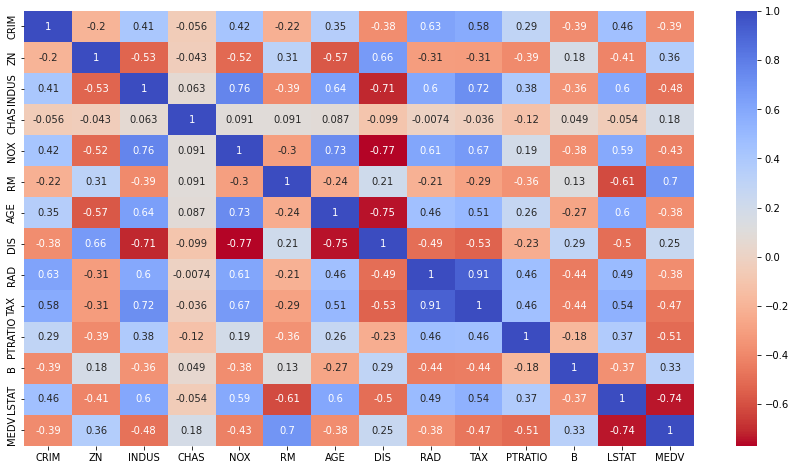

In [6]:
f, (ax1) = plt.subplots(1,1,figsize=(15,8))
corr_matrix = boston_df.corr(method='pearson')
sb.heatmap(corr_matrix,cmap='coolwarm_r', annot=True, ax = ax1)

## Plot the Spearman correlation Matrix

<AxesSubplot:>

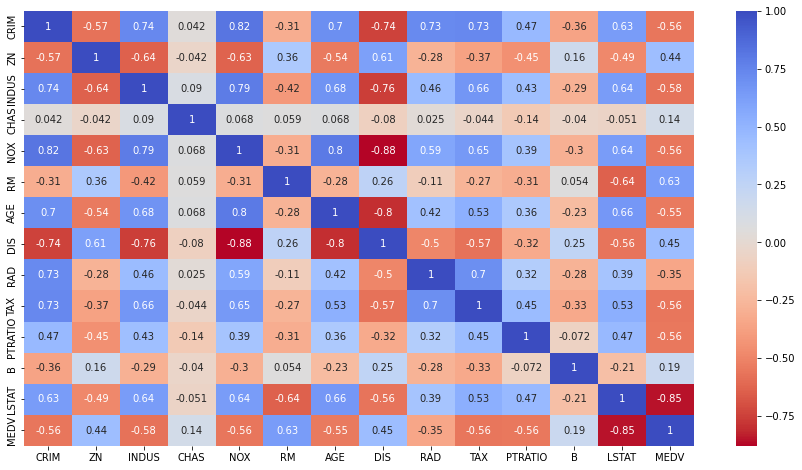

In [7]:
f, (ax1) = plt.subplots(1,1,figsize=(15,8))
corr_matrix = boston_df.corr(method='spearman')
sb.heatmap(corr_matrix,cmap='coolwarm_r', annot=True, ax = ax1)

RM and LSTAT show a moderate-to-strong correlation in our target
## Scatter Plot (RM and LSTAT)

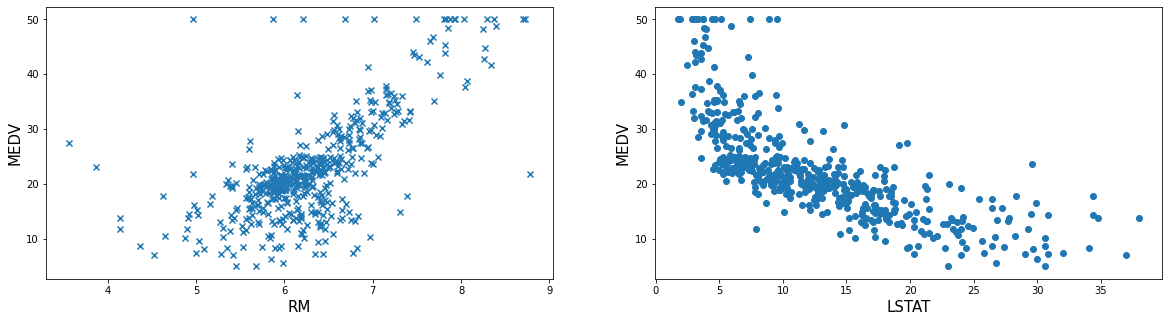

In [8]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
ax1.scatter(boston_df.RM, boston_df.MEDV, marker = 'x')
ax1.set_xlabel("RM", fontsize=15)
ax1.set_ylabel("MEDV", fontsize=15)

ax2 = fig.add_subplot(122)
ax2.scatter(boston_df.LSTAT, boston_df.MEDV, marker = 'o')
ax2.set_xlabel("LSTAT",fontsize=15)
ax2.set_ylabel("MEDV", fontsize=15)
plt.show()

## Generate polynomial features (using LSTAT or RM as predictor)

In [9]:
def polynomial_features(dataframe, degree):
    df = dataframe.copy()
    feature_name = dataframe.columns[0]
    for i in range(1,degree):
        key = "{}^{}".format(feature_name,i+1)
        df[key] = df[feature_name]**(i+1)
    return df

In [10]:
selected_feature = 'RM'

In [11]:
X = boston_df[[selected_feature]]

## Fitting several polynomial models of different degree

In [12]:
def featureScaling(X):
    Z = np.copy(X)
    mu = np.mean(Z,axis=0)
    std = np.std(Z,axis=0)
    Z = (Z - mu)/std
    return Z

In [13]:
X_poly_2_scaled = featureScaling(polynomial_features(X,2))
X_poly_3_scaled = featureScaling(polynomial_features(X,3))
X_poly_4_scaled = featureScaling(polynomial_features(X,4))
X_poly_5_scaled = featureScaling(polynomial_features(X,5))
X_poly_6_scaled = featureScaling(polynomial_features(X,6))
X_poly_7_scaled = featureScaling(polynomial_features(X,7))
X_poly_8_scaled = featureScaling(polynomial_features(X,8))

In [14]:
X_linear = np.c_[np.ones((X.shape[0],1)), X]
X_poly_2_scaled_int = np.c_[np.ones((X_poly_2_scaled.shape[0],1)),X_poly_2_scaled]
X_poly_3_scaled_int = np.c_[np.ones((X_poly_3_scaled.shape[0],1)),X_poly_3_scaled]
X_poly_4_scaled_int = np.c_[np.ones((X_poly_4_scaled.shape[0],1)),X_poly_4_scaled]
X_poly_5_scaled_int = np.c_[np.ones((X_poly_5_scaled.shape[0],1)),X_poly_5_scaled]
X_poly_6_scaled_int = np.c_[np.ones((X_poly_6_scaled.shape[0],1)),X_poly_6_scaled]
X_poly_7_scaled_int = np.c_[np.ones((X_poly_7_scaled.shape[0],1)),X_poly_7_scaled]
X_poly_8_scaled_int = np.c_[np.ones((X_poly_8_scaled.shape[0],1)),X_poly_8_scaled]

In [15]:
y = boston_df[["MEDV"]].values

## Multivariate Linear Regression

In [16]:
def computeCostVectorized(X, y, theta = np.zeros((X.shape[1],1))):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()
    J = 1/(2*m) * ((X.dot(theta) - y).T.dot(X.dot(theta) - y))
    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J,elapsed_time_ms

In [17]:
def gradientDescentVectorized(X, y, theta = np.zeros((X.shape[1],1)), alpha = 0.001, n_iters = 1000, early = False, epsilon = 0.000001):
    m = X.shape[0]
    n = X.shape[1]
    J = np.zeros((n_iters,1))
    theta_history = []
    theta_gd = np.copy(theta)

    theta_history.append(theta)

    elapsed_time = -time.time()
    for iter in range(n_iters):
        J[iter],_= computeCostVectorized(X,y,theta_gd)

        theta_gd = theta_gd - (alpha/m) * X.T.dot(X.dot(theta_gd) -y)

        theta_history.append(np.copy(theta_gd))

        if early:
            if (iter != 0) and (J[iter -1 ] - J[iter] < epsilon):
                elapsed_time += time.time()
                elapsed_time = np.round(elapsed_time*1000,3)
                #stdout.write("\n")
                return theta_gd,J[J!=0],elapsed_time,theta_history

    elapsed_time += time.time()
    elapsed_time = np.round(elapsed_time*1000,3)
    #stdout.write("\n")
    return theta_gd,J,elapsed_time,theta_history

In [24]:
epsilon = 0.00000001
iterations = 100000
alpha = 0.01

theta_linear,_,_,_ = gradientDescentVectorized(X_linear, y, theta= np.zeros((X_linear.shape[1],1)),alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_2,_,_,_ = gradientDescentVectorized(X_poly_2_scaled_int, y, theta= np.zeros((X_poly_2_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_3,_,_,_ = gradientDescentVectorized(X_poly_3_scaled_int, y,  theta= np.zeros((X_poly_3_scaled_int.shape[1],1)),alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_4,_,_,_ = gradientDescentVectorized(X_poly_4_scaled_int, y,  theta= np.zeros((X_poly_4_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_5,_,_,_ = gradientDescentVectorized(X_poly_5_scaled_int, y,  theta= np.zeros((X_poly_5_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_6,_,_,_ = gradientDescentVectorized(X_poly_6_scaled_int, y, theta= np.zeros((X_poly_6_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_7,_,_,_ = gradientDescentVectorized(X_poly_7_scaled_int, y,  theta= np.zeros((X_poly_7_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)
theta_poly_8,_,_,_ = gradientDescentVectorized(X_poly_8_scaled_int, y,  theta= np.zeros((X_poly_8_scaled_int.shape[1],1)), alpha = alpha, n_iters = iterations, early = True, epsilon = epsilon)

## Plot all the fitted models

Sorting for plot

In [25]:
X_2,yhat_2 = zip(*sorted(zip(X.values, X_poly_2_scaled_int.dot(theta_poly_2))))
X_3,yhat_3 = zip(*sorted(zip(X.values, X_poly_3_scaled_int.dot(theta_poly_3))))
X_4,yhat_4 = zip(*sorted(zip(X.values, X_poly_4_scaled_int.dot(theta_poly_4))))
X_5,yhat_5 = zip(*sorted(zip(X.values, X_poly_5_scaled_int.dot(theta_poly_5))))
X_6,yhat_6 = zip(*sorted(zip(X.values, X_poly_6_scaled_int.dot(theta_poly_6))))
X_7,yhat_7 = zip(*sorted(zip(X.values, X_poly_7_scaled_int.dot(theta_poly_7))))
X_8,yhat_8 = zip(*sorted(zip(X.values, X_poly_8_scaled_int.dot(theta_poly_8))))

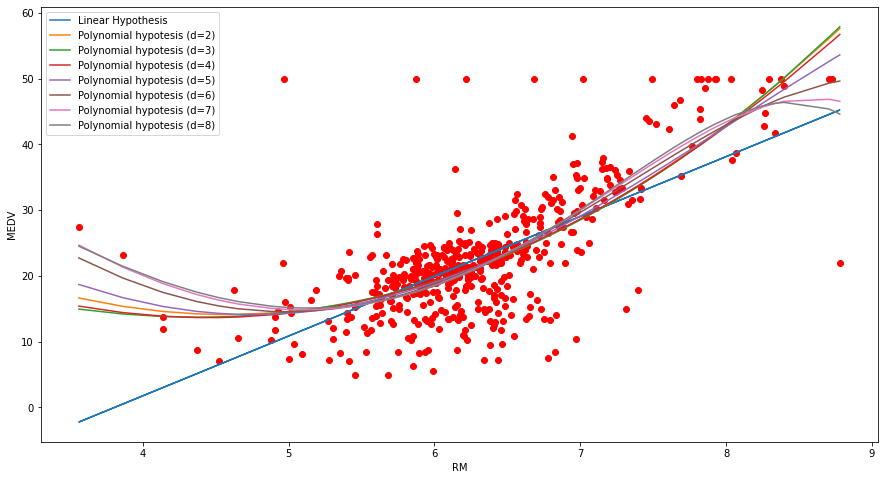

In [26]:
plt.figure(figsize=(15,8))
plt.xlabel(selected_feature)
plt.ylabel('MEDV')
plt.scatter(X,y,c='r')
plt.plot(X.values,X_linear.dot(theta_linear), label = 'Linear Hypothesis')
plt.plot(X_2,yhat_2, label = 'Polynomial hypotesis (d=2)')
plt.plot(X_3,yhat_3, label = 'Polynomial hypotesis (d=3)')
plt.plot(X_4,yhat_4, label = 'Polynomial hypotesis (d=4)')
plt.plot(X_5,yhat_5, label = 'Polynomial hypotesis (d=5)')
plt.plot(X_6,yhat_6, label = 'Polynomial hypotesis (d=6)')
plt.plot(X_7,yhat_7, label = 'Polynomial hypotesis (d=7)')
plt.plot(X_8,yhat_8, label = 'Polynomial hypotesis (d=8)')
plt.legend()
plt.show()